# Unsupervised Learning (Gaussian Mixture Model)

Author: Christoph Guettner

**Abstract**  
Beim _unsupervised learning_ werden einem unklassifizierten  
Datensatz aufgrund der zugrundeliegenden Ähnlichkeit der Datenpunkte  
die jeweilige Klasse zugeordnet. Im Gegensatz zur K-Means Methode  
wird beim _Gaussian Mixture Model_ die zugrundeliegende  
Wahrscheinlichkeitsverteilung (hier: Normalverteilung)  
zur Klassifizierung herangezogen. Dies hat den Vorteil,  
dass Wahrscheinlichkeitszuordnungen (soft classification)  
möglich wird. Jeder Datenpunkt wird der Verteilung zugeordnet,  
welcher er mit der höchsten Wahrscheinlichkeit zugehört. 

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Class Imports](#Class_Imports)
    * [Functions](#Functions)  

* [Model Selection](#Model_Selection)
    * [Visualisation and Kernel Density Estimation](#Visualisation_and_Kernel_Density_Estimation)
    * [Information Criteria (AIC, BIC)](#Information_Criteria_AIC_BIC)       
    
* [Learned Patterns](#Learned_Patterns)
    * [Model Prediction](#Model_Prediction)
    * [Explanatory Data Visualisation](#Explanatory_Data_Visualisation)



In [1]:
import pandas as pd
import numpy as np
from itertools import cycle

from scipy import linalg
from scipy import linalg



from sklearn import metrics

from sklearn.datasets import make_blobs, make_s_curve
from sklearn import mixture

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
sns.set() 

In [17]:
#Functions

def plot_KernelDensity(Data, names):
    fig = plt.figure(figsize=(15,10),facecolor=(.18, .31, .31))
    fig.suptitle('Raw Data', color ='0.7')
    k=1
    for i in range(len(Data)):
        ax = fig.add_subplot(2,3,k)
        ax.set_title(Form[k-1], color='orange')
        plt.scatter(Data[i][:,0],Data[i][:,1])
        ax.set_xlabel('feature 2', color='0.7')
        ax.set_ylabel('feature 1', color='0.7')
        ax.tick_params(labelcolor='tab:orange')
        plt.legend([])
        k+=1
        ax = fig.add_subplot(2,3,k)
        ax.set_title(Form[k-1], color='orange')
        sns.distplot(Data[i][:,0])
        ax.tick_params(labelcolor='tab:orange')
        k+=1
        ax = fig.add_subplot(2,3,k)
        ax.set_title(Form[k-1], color='orange')
        sns.distplot(Data[i][:,1])
        ax.tick_params(labelcolor='tab:orange')
        k+=1

def get_GMMS(Data, n_components):
    Models_Blobs, Models_Ellipse =[], []
    for j in range(len(Data)):
        for i in range(len(n_components)):
                gmm = mixture.GaussianMixture(n_components=n_components[i],\
                                            covariance_type='full')
                gmms =gmm.fit(Data[j])
                if j==0:
                    Models_Blobs.append(gmms)
                else:
                    Models_Ellipse.append(gmms)
    return Models_Blobs, Models_Ellipse

def get_info(Data, Models):
    AIC_Blobs_list, BIC_Blobs_list,AIC_Ellipse_list, BIC_Ellipse_list=[],[],[],[]
    for j in range(len(Data)):
        for i in range(int(len(Models)/int(2))):
            if j<1:
                A_IC=Models_Blobs[i].aic(Data[j])
                B_IC=Models_Blobs[i].bic(Data[j])
                AIC_Blobs_list.append(A_IC)
                BIC_Blobs_list.append(B_IC)
            else:
                A_IC=Models_Ellipse[i].aic(Data[j])
                B_IC=Models_Ellipse[i].bic(Data[j])
                AIC_Ellipse_list.append(A_IC)
                BIC_Ellipse_list.append(B_IC)
    return AIC_Blobs_list, BIC_Blobs_list, AIC_Ellipse_list, BIC_Ellipse_list

def plot_InformationCriteria(names, Info_lists, n_components):
    fig = plt.figure(figsize=(10,5),facecolor=(.18, .31, .31))
    fig.suptitle('Information Criteria', color ='0.7')
    for i in range(2):
        ax = fig.add_subplot(1,2,(i+1))
        ax.set_title(IC_names[i], color='orange')
        ax.plot(n_components,IC[i])
        ax.plot(n_components,IC[i+2])
        ax.legend(['AIC', 'BIC'])
        ax.tick_params(labelcolor='tab:orange')

def plot_Learned_Pattern_Complete(Data, Learned_Distribution):
    fig = plt.figure(figsize=(15,10),facecolor=(.18, .31, .31))
    fig.suptitle('Learned Pattern', color ='0.7')
    k=1
    for i in range (len(Models_chosen)):
        xx, yy = np.meshgrid(np.linspace(Data[i][:,0].min()-1, \ 
                                         Data[i][:,0].max()+1, 50),\
                             np.linspace(Data[i][:,1].min()-1, \
                                         Data[i][:,1].max()+1, 50))
        XX = np.array([xx.ravel(), yy.ravel()]).T
        #XX = np.array([X.ravel(), Y.ravel()]).T
        Z = Models_chosen[i].score_samples(XX)
        Z = Z.reshape((50,50))
        Z= np.exp(Z)
        ax = fig.add_subplot(2,3,k, projection='3d')
        ax.set_title(Learned_Distribution[k-1], color='orange')
        ax.plot_surface(xx, yy, Z, cmap='seismic',)
        ax.view_init(20,260)
        ax.tick_params(labelcolor='tab:orange')
        plt.draw()
        k+=1
        ax = fig.add_subplot(2,3,k)
        ax.set_title(Learned_Distribution[k-1], color='orange')
        ax.tick_params(labelcolor='tab:orange')
        ax.contour(xx, yy, Z, 20, cmap='Oranges', lw='5')
        ax.scatter(Data[i][:,0],Data[i][:,1], alpha=0.4,color='blue' )
        ax.scatter(Models_chosen[i].means_[:,0],Models_chosen[i].means_[:,1], \
                                                                marker='*')
        k+=1
        ax = fig.add_subplot(2,3,k)
        ax.set_title(Learned_Distribution[k-1], color='orange')
        GMM_Pred= Models_chosen[i].predict(Data[i])
        ax.scatter(Data[i][GMM_Pred==0,0],Data[i][GMM_Pred==0,1],color='orange')
        ax.scatter(Data[i][GMM_Pred==1,0],Data[i][GMM_Pred==1,1],color='red')
        ax.scatter(Data[i][GMM_Pred==2,0],Data[i][GMM_Pred==2,1], color='blue')
        ax.scatter(Models_chosen[i].means_[:,0],Models_chosen[i].means_[:,1], \
                                                                    marker='*')
        k+=1
    plt.show()



In [10]:

#load Data
centers = [(22,28), (68, 64), (75, 23)]
n_samples=1000
X_0, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state=0, cluster_std=10)

np.random.seed(0)
n_samples = 500
C = np.array([[0., -0.1], [1.7, .4]])
X_1 = np.r_[np.dot(np.random.randn(n_samples, 2), C), 0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

Data=[X_0,X_1]

## Model_Selection

### Visualisation_and_Kernel_Density_Estimation

Bei der _Kernel Density Estimation_ werden anhand  
der Häufigkeitsverteilung (Histogramme) versucht  
Rückschlüsse auf die Anzahl zugrundeliegendenden  
Verteilungen abzuleiten. 

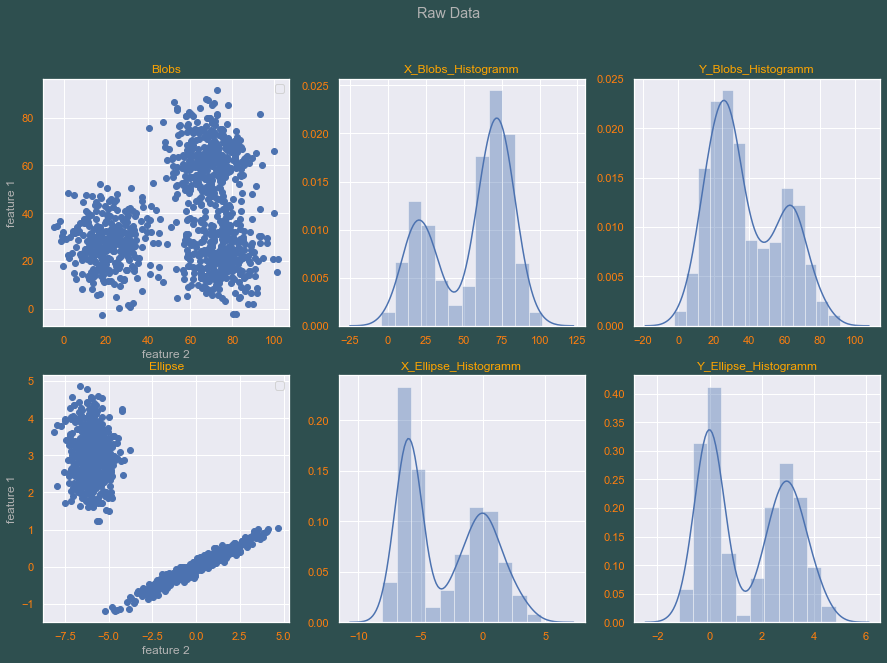

In [18]:
Form=['Blobs', 'X_Blobs_Histogramm', 'Y_Blobs_Histogramm', 'Ellipse', 'X_Ellipse_Histogramm', 'Y_Ellipse_Histogramm']
plot_KernelDensity(Data, Form)
    


### Information_Criteria_AIC_BIC

Die Informationskriterien AIC (Akaike Information Criteria)  
und BIC (Bayesian Information Criteria) schätzen die optimale Anzahl
von Modelparamtern (Mean, Variance).

+ $AIC = 2k-2 ln(\widehat{L})$

+ $BIC = k \ln(n) -2 ln(\widehat{L})$

$k$: Anzahl der Verteilungen (Mean, Variance)  
$\widehat{L}$: Maximum der _Likelihood_ Funktion 

Der jeweils zweite Summand verhindert Overfitting bzw. Überkomplexität.


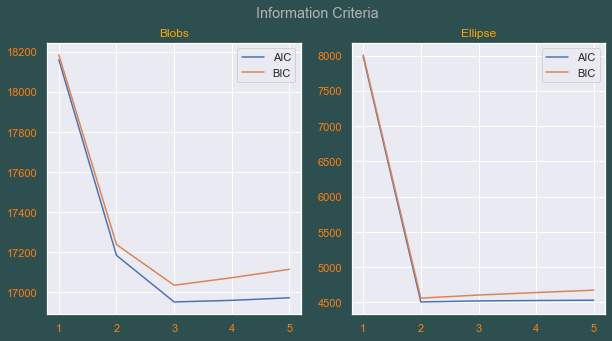

In [10]:
n_components=[1,2,3,4,5]
Models_Blobs, Models_Ellipse = get_GMMS(Data,n_components )
Models = Models_Blobs + Models_Ellipse 
AIC_Blobs_list, BIC_Blobs_list, AIC_Ellipse_list, BIC_Ellipse_list = get_info(Data, Models)

IC_names=['Blobs', 'Ellipse']
IC=[AIC_Blobs_list,AIC_Ellipse_list,BIC_Blobs_list, BIC_Ellipse_list]
plot_InformationCriteria(IC_names, IC, n_components)

## Choose Models and Visualise Results

### Model_Prediction

+ Models_Blobs: 3
+ Models_Ellipse: 2

In [11]:
Models_chosen =[Models_Blobs[2], Models_Ellipse[1]]

### Explanatory_Data_Visualisation

Im folgenden werden die gelernten Normalverteilungen in   
+ 3D  
+ 2D 

und die entstehende Klassifikation mittels Einfärbung dargestellt

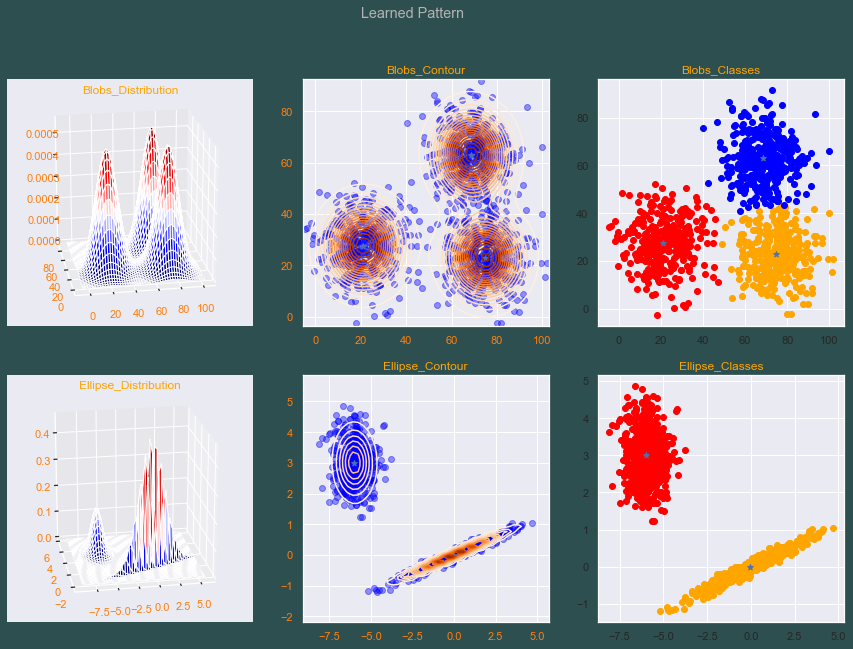

In [12]:

Learned_Distribution =['Blobs_Distribution','Blobs_Contour', 'Blobs_Classes', \
                    'Ellipse_Distribution','Ellipse_Contour','Ellipse_Classes']
plot_Learned_Pattern_Complete(Data, Learned_Distribution)